In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(42)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

## Data Preprocessing

In [2]:
# Read in movie csv
movies = pd.read_csv("../Resources/imdb_final.csv")
movies.head()

,index,imdb_title_id,title,year,genre,duration,country,director,production_company,budget,...,under30,under45,males,malesunder18,malesunder30,malesunder45,females,femalesunder18,femalesunder30,femalesunder45
0,0,tt0035423,Kate & Leopold,2001,Comedy,118,USA,James Mangold,Konrad Pictures,48000000,...,6.3,6.4,6.3,6.5,6.2,6.3,6.6,6.7,6.4,6.7
1,1,tt0113026,The Fantasticks,2000,Musical,86,USA,Michael Ritchie,Michael Ritchie Productions,10000000,...,5.5,5.4,5.3,5.4,5.4,5.3,5.7,5.6,5.8,5.6
2,2,tt0118589,Glitter,2001,Drama,104,USA,Vondie Curtis-Hall,Twentieth Century Fox,22000000,...,2.1,2.1,1.9,2.1,1.9,2.0,2.9,3.2,2.7,2.5
3,3,tt0118652,The Attic Expeditions,2001,Comedy,100,USA,Jeremy Kasten,Tse Tse Fly Productions,1000000,...,5.1,4.6,5.0,4.7,5.1,4.6,4.8,5.8,4.6,4.6
4,4,tt0120467,Vulgar,2000,Crime,87,USA,Bryan Johnson,Chango Productions,120000,...,5.3,5.0,5.3,6.1,5.3,5.1,5.2,5.2,5.3,4.6


In [13]:
# Set vote column to integer type
movies["median_vote"] = movies["median_vote"].astype(int)
movies["median_vote"].unique()

array([ 7,  6,  1,  5,  8,  4,  9,  2,  3, 10])

In [4]:
# Set values for X and y
X = movies[["year", "genre", "duration", "budget"]]
y = movies["median_vote"].values.reshape(-1,1)
print(X.shape, y.shape)

(5060, 4) (5060, 1)


In [5]:
data = X.copy()
data

,year,genre,duration,budget
0,2001,Comedy,118,48000000
1,2000,Musical,86,10000000
2,2001,Drama,104,22000000
3,2001,Comedy,100,1000000
4,2000,Crime,87,120000
...,...,...,...,...
5055,2019,Comedy,84,5000000
5056,2019,Drama,94,95000
5057,2019,Action,84,100000
5058,2019,Action,92,3000000


In [6]:
# Dummy Encoding for genre column
data_binary_encoded = pd.get_dummies(data, columns= ["genre"])
data_binary_encoded.head()

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,genre_Fantasy,genre_Horror,genre_Music,genre_Musical,genre_Mystery,genre_Romance,genre_Sci-Fi,genre_Sport,genre_Thriller,genre_Western
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, random_state=42, stratify=y)


In [8]:
# Create StandardScaler model and fit to training data
X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

# Transform training and testing data using X_scaler and y_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)
# print(y_train_scaled)

In [35]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
encoded_y_train

array([5, 7, 8, ..., 4, 8, 4], dtype=int64)

In [36]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Create Deep Learning Model

In [32]:
# Create deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
deep_model = Sequential()
deep_model.add(Dense(units=100, activation= "relu", input_dim=21))
deep_model.add(Dense(units=100, activation= "relu"))
deep_model.add(Dense(units=11, activation= "softmax"))

In [33]:
# Compile and fit the model
deep_model.compile(optimizer = "adam", loss= "categorical_crossentropy", metrics=["accuracy"])
deep_model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 11)                1111      
Total params: 13,411
Trainable params: 13,411
Non-trainable params: 0
_________________________________________________________________


In [38]:
deep_model.fit(X_train_scaled, y_train_categorical, epochs=100, shuffle=True, verbose=2)

ValueError: A target array with shape (3795, 10) was passed for an output of shape (None, 11) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

## Quantify the Model

In [23]:
model_loss, model_accuracy = deep_model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1265/1265 - 0s - loss: 2.0200 - accuracy: 0.3028
Deep Neural Network - Loss: 2.019956613058158, Accuracy: 0.3027667999267578


## Make Predictions

In [25]:
encoded_predictions = deep_model.predict_classes(X_test_scaled[:5])


print(f"Predicted classes: {encoded_predictions}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [10  6  7  7  6]
Actual Labels: [array([8]), array([6]), array([5]), array([7]), array([2])]


## Plot Residuals

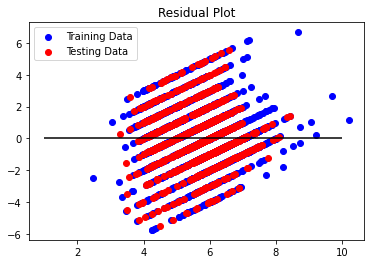

In [16]:
predictions_train = linear_model.predict(X_train)
predictions_test = linear_model.predict(X_test)

plt.scatter(predictions_train, predictions_train - y_train, c="blue", label= "Training Data")
plt.scatter(predictions_test, predictions_test - y_test, c="red", label= "Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [24]:
print(list(predictions_test[:20]))
print(list(y_test[:20]))

[array([6.79674685]), array([5.25572202]), array([6.43195052]), array([6.27945198]), array([5.04182973]), array([5.99998277]), array([6.64912395]), array([6.52819546]), array([6.20187875]), array([6.23358182]), array([5.40278313]), array([4.74767309]), array([4.88883813]), array([6.13086792]), array([5.10507291]), array([6.18364742]), array([6.53367067]), array([6.10869522]), array([8.10331261]), array([5.57228769])]
[array([8]), array([6]), array([5]), array([7]), array([2]), array([7]), array([6]), array([7]), array([7]), array([6]), array([3]), array([2]), array([6]), array([7]), array([2]), array([3]), array([6]), array([6]), array([8]), array([10])]


## Save Model